# Lesson 4: Real World Data

> Instructor: [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:nya@prpr.zip)
>
> The Christian F. Weichman Department of Chemistry, Lastoria Royal College of Science

This material is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">


In the last lesson, we focused on clean, customizable plots in Matplotlib using simple functions (with a brief look at an IR spectrum, but without handling it in detail). Real experimental work, however, is rarely so tidy—measurements carry noise, instruments have limits, and data often needs statistical treatment before it can be trusted. In this lesson, we will learn how to handle real-world data: importing it from files, exploring its structure, and visualizing it effectively. We will also practice fitting models to data, a key step in extracting meaningful parameters from experiments. Along the way, we'll introduce basic statistical tools—mean, standard deviation, error bars—that help us evaluate both the data and the quality of our fits.

## Reading and Writing Files

As usual, we start by importing the necessary modules.

```python
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Before we can analyze data, we need to **load** it from a file. The `np.loadtxt` function is a convenient way to read a text file into an array. Its general form is `np.loadtxt(filename, delimiter, skiprows)`, where:

- `filename` is the path to the file (as a string),
- `delimiter` specifies how columns are separated, and
- `skiprows` tells NumPy how many header lines to ignore.

As an example, let's read the first ionization energies ($I_1$) of elements 1–103 from a `.csv` file named `first_ionization_energy.csv`, which is stored in the same directory as this notebook.

Data was taken from: Weller, M.; Overton, T.; Rourke, J.; Armstrong, F. A. _Inorganic Chemistry_; Oxford University Press: Oxford, 2018. ISBN 9780198768128.

```python
ie1 = np.loadtxt('first_ionization_energy.csv', delimiter=',', skiprows=1)
ie1
```

In [2]:
ie1 = np.loadtxt('first_ionization_energy.csv', delimiter=',', skiprows=1)
ie1

array([[  1.   ,  13.6  ],
       [  2.   ,  24.59 ],
       [  3.   ,   5.32 ],
       [  4.   ,   9.321],
       [  5.   ,   8.297],
       [  6.   ,  11.257],
       [  7.   ,  14.53 ],
       [  8.   ,  13.62 ],
       [  9.   ,  17.42 ],
       [ 10.   ,  21.56 ],
       [ 11.   ,   5.138],
       [ 12.   ,   7.642],
       [ 13.   ,   5.984],
       [ 14.   ,   8.151],
       [ 15.   ,  10.485],
       [ 16.   ,  10.36 ],
       [ 17.   ,  12.966],
       [ 18.   ,  15.76 ],
       [ 19.   ,   4.34 ],
       [ 20.   ,   6.111],
       [ 21.   ,   6.54 ],
       [ 22.   ,   6.82 ],
       [ 23.   ,   6.74 ],
       [ 24.   ,   6.764],
       [ 25.   ,   7.435],
       [ 26.   ,   7.869],
       [ 27.   ,   7.876],
       [ 28.   ,   7.635],
       [ 29.   ,   7.725],
       [ 30.   ,   9.393],
       [ 31.   ,   5.998],
       [ 32.   ,   7.898],
       [ 33.   ,   9.814],
       [ 34.   ,   9.751],
       [ 35.   ,  11.814],
       [ 36.   ,  13.998],
       [ 37.   ,   4.177],
 

You should always check your original data before reading it! They may have a (or more than one) row of header information, which you should skip. Also, the delimiter may be different from the comma, so you should check and state it explicitly.

It is not quite informative if we just print the array. Let's do some plotting—feel the power of Matplotlib!

```python
plt.figure(figsize=(8,5))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies of Elements')

plt.xlabel('Atomic Number')
plt.ylabel('First Ionization Energy (eV)')

plt.xticks(np.arange(1, 104, 10))

plt.grid(linestyle=':')

plt.show()
```

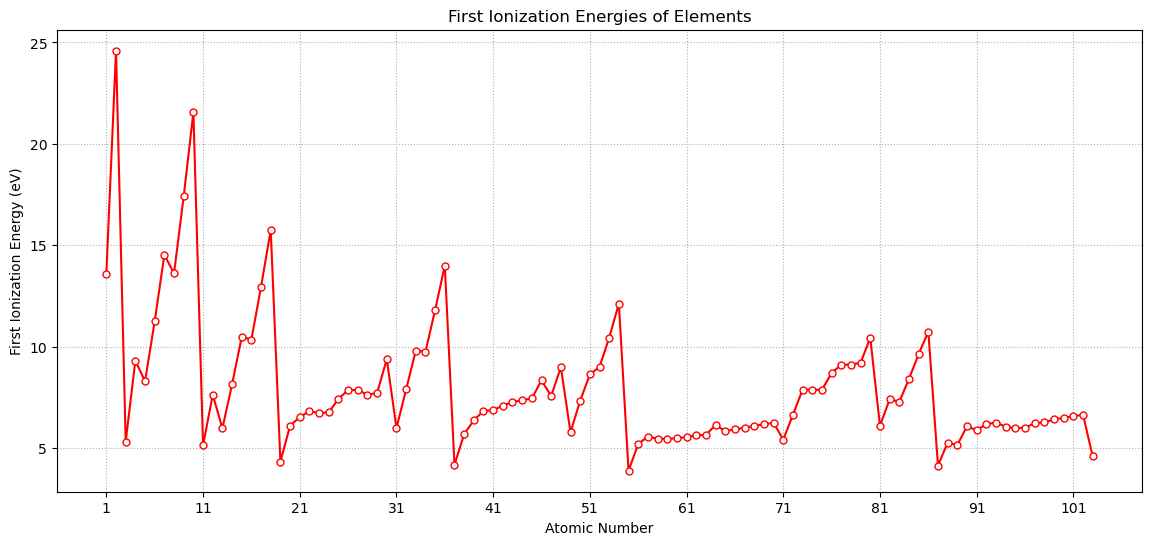

In [3]:
plt.figure(figsize=(14,6))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies of Elements')

plt.xlabel('Atomic Number')
plt.ylabel('First Ionization Energy (eV)')

plt.xticks(np.arange(1, 104, 10))

plt.grid(linestyle=':')

plt.show()

Sometimes, the data you want to read may contain missing values. Try to load the `electron_affinity.csv` file, which contains the electron affinities of elements in first four periods:

```python
ea = np.loadtxt('electron_affinity.csv', delimiter=',', skiprows=1)
ea
```

In [4]:
# ea = np.loadtxt('electron_affinity.csv', delimiter=',', skiprows=1)
# ea

Oh... another error! Take a look of the `electron_affinity.csv` file—you should see that for $\ce{Be}$, $\ce{Mg}$, and the whole 1st TM region, the electron affinity data is missing. Actually, `np.loadtxt` _cannot read files with missing values_. You can use `np.genfromtxt` instead, which is a more flexible version of `np.loadtxt`. In case there is a data missing, `np.genfromtxt` will automatically fill in the missing values with `np.nan`—a special value that represents missing data.

Data was taken from: Weller, M.; Overton, T.; Rourke, J.; Armstrong, F. A. _Inorganic Chemistry_; Oxford University Press: Oxford, 2018. ISBN 9780198768128.

```python
# the `skiprows` argument is changed to `skip_header` for `np.genfromtxt`
ea = np.genfromtxt('electron_affinity.csv', delimiter=',', skip_header=1)
ea
```

In [5]:
# the `skiprows` argument is changed to `skip_header` for `np.genfromtxt`
ea = np.genfromtxt('electron_affinity.csv', delimiter=',', skip_header=1)
ea

array([[ 1.000e+00,  7.540e-01],
       [ 2.000e+00, -5.000e-01],
       [ 3.000e+00,  6.180e-01],
       [ 4.000e+00,        nan],
       [ 5.000e+00,  2.770e-01],
       [ 6.000e+00,  1.263e+00],
       [ 7.000e+00, -7.000e-02],
       [ 8.000e+00,  1.461e+00],
       [ 9.000e+00,  3.399e+00],
       [ 1.000e+01, -1.200e+00],
       [ 1.100e+01,  5.480e-01],
       [ 1.200e+01,        nan],
       [ 1.300e+01,  4.410e-01],
       [ 1.400e+01,  1.385e+00],
       [ 1.500e+01,  7.470e-01],
       [ 1.600e+01,  2.077e+00],
       [ 1.700e+01,  3.617e+00],
       [ 1.800e+01, -1.000e+00],
       [ 1.900e+01,  5.020e-01],
       [ 2.000e+01,  2.000e-02],
       [ 2.100e+01,        nan],
       [ 2.200e+01,        nan],
       [ 2.300e+01,        nan],
       [ 2.400e+01,        nan],
       [ 2.500e+01,        nan],
       [ 2.600e+01,        nan],
       [ 2.700e+01,        nan],
       [ 2.800e+01,        nan],
       [ 2.900e+01,        nan],
       [ 3.000e+01,        nan],
       [ 3

Let's plot the electron affinities to see how `plt.plot` handles `np.nan`.

```python
plt.figure(figsize=(8,4))

plt.plot(ea[0:,0], ea[0:,1], color='red', marker='o', mfc='white', ms=5)

plt.title('Electron Affinities of Some Elements')

plt.xlabel('Atomic Number')
plt.ylabel('Electron Affinity (eV)')

plt.xticks(np.arange(1, 37, 5))
plt.xticks(np.arange(1, 37, 1), minor=True)

plt.grid(linestyle=':')

plt.show()
```

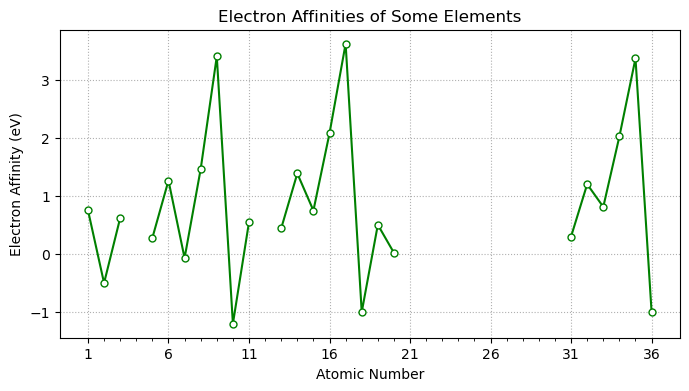

In [6]:
plt.figure(figsize=(8,4))

plt.plot(ea[0:,0], ea[0:,1], color='green', marker='o', mfc='white', ms=5)

plt.title('Electron Affinities of Some Elements')

plt.xlabel('Atomic Number')
plt.ylabel('Electron Affinity (eV)')

plt.xticks(np.arange(1, 37, 5))
plt.xticks(np.arange(1, 37, 1), minor=True)

plt.grid(linestyle=':')

plt.show()

However, if you want to do some data analysis, the `np.nan` may cause problems. You may want to change it to a designated value, such as `0`. You can do this by using the `filling_values` argument of `np.genfromtxt`.

```python
ea = np.genfromtxt('electron_affinity.csv', delimiter=',', skip_header=1, filling_values=0)
ea
```

In [7]:
ea = np.genfromtxt('electron_affinity.csv', delimiter=',', skip_header=1, filling_values=0)
ea

array([[ 1.000e+00,  7.540e-01],
       [ 2.000e+00, -5.000e-01],
       [ 3.000e+00,  6.180e-01],
       [ 4.000e+00,  0.000e+00],
       [ 5.000e+00,  2.770e-01],
       [ 6.000e+00,  1.263e+00],
       [ 7.000e+00, -7.000e-02],
       [ 8.000e+00,  1.461e+00],
       [ 9.000e+00,  3.399e+00],
       [ 1.000e+01, -1.200e+00],
       [ 1.100e+01,  5.480e-01],
       [ 1.200e+01,  0.000e+00],
       [ 1.300e+01,  4.410e-01],
       [ 1.400e+01,  1.385e+00],
       [ 1.500e+01,  7.470e-01],
       [ 1.600e+01,  2.077e+00],
       [ 1.700e+01,  3.617e+00],
       [ 1.800e+01, -1.000e+00],
       [ 1.900e+01,  5.020e-01],
       [ 2.000e+01,  2.000e-02],
       [ 2.100e+01,  0.000e+00],
       [ 2.200e+01,  0.000e+00],
       [ 2.300e+01,  0.000e+00],
       [ 2.400e+01,  0.000e+00],
       [ 2.500e+01,  0.000e+00],
       [ 2.600e+01,  0.000e+00],
       [ 2.700e+01,  0.000e+00],
       [ 2.800e+01,  0.000e+00],
       [ 2.900e+01,  0.000e+00],
       [ 3.000e+01,  0.000e+00],
       [ 3

Let's say that you want to **export** this modified data to a new `.csv` file. You can use the `np.savetxt` function to do this. It takes two key arguments: `fname` and `X`, which are the name of the file and the data to be saved.

```python
np.savetxt('electron_affinity_modified.csv', ea, delimiter=',')
```

In [8]:
np.savetxt('electron_affinity_modified.csv', ea)

You should see a new file named `electron_affinity_modified.csv` in the same directory as this notebook.

There are lots of methods to load and save data. You can find them in the documentation: [loading files](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html), [loading files with missing entries](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html), and [saving files](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html).

<span style="color:green">**Exercise**:</span> Load the UV-Vis data of azobenzene (data from the [NIST Chemistry WebBook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C103333&Units=SI&Mask=400#UV-Vis-Spec)) and plot the UV-Vis spectrum. The data is stored in the file `103-33-3-UVVis.jdx`.


_Hint: First check your data! Open it in notebook software and see what it looks like._

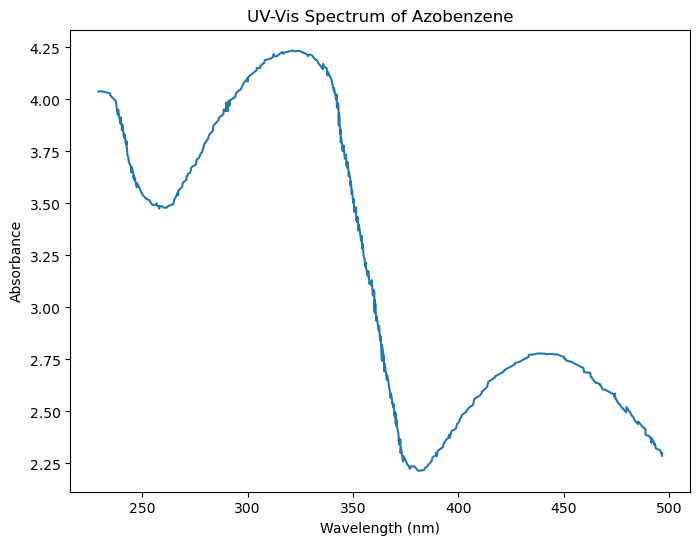

In [9]:
azo_uvvis = np.loadtxt('103-33-3-UVVis.jdx', delimiter=',', skiprows=32)

plt.figure(figsize=(8,6))
plt.plot(azo_uvvis[0:,0], azo_uvvis[0:,1])

plt.title('UV-Vis Spectrum of Azobenzene')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')

plt.show()

## More on Plotting

### Annotations

The plot you made from the $I_1$ data looks really nice, right? The trend shown in this figure is really easy to interpret—you might recall from high school chemistry that the first ionization energy generally increases across a period, with some particular exceptions. For example, the $I_1$ of $\ce{Be}$ is $9.321\,\mathrm{eV}$, while that of $\ce{B}$ is only $8.297\,\mathrm{eV}$. Similar irregularities appear between $\ce{N}$ and $\ce{O}$. It's a good idea to label these elements explicitly so that first-time learners can easily spot these element-pairs of exceptions. This can be done with the `plt.annotate()` function. This function is a bit more complicated but very powerful. It takes a lot of arguments:
```python
plt.annotate(text, xy, xytext, arrowprops)
```
At minimum, it requires two arguments: `text`, the text string to display, and `xy`, the coordinates of the point you want to annotate. For example:
```python
plt.annotate('Be', xy=(4, 9.321))
```
This will add a text label $\ce{Be}$ at the point (4, 9.321). Here, the `xy` argument is a tuple of two numbers, which specifies the coordinates of the point _you want to annotate_. <u>This coordinate is in the same coordinate system as the plot, which is the same as the axes.</u> You can also specify the position of the _text itself_ (so it doesn’t overlap the data point or your plot) using the `xytext` argument, and draw an arrow from the text to the data point with the `arrowprops` argument. For example:
```python
plt.annotate('Be', xy=(4, 9.321), xytext=(7.5, 8), arrowprops=dict(facecolor='black', shrink=0.05))
```
This will add a text label $\ce{Be}$ at the point (4, 9.321), with the text positioned at (7.5, 8), and with an arrow pointing from the text to the data point. You may notice that the `arrowprops` argument is a also complex, which contains a number of options for customizing the arrow. For example, you can change the color of the arrow with the `facecolor` argument, and _change the size of the arrow with the `shrink` argument_. Let's see an example of this in action:

```python
plt.figure(figsize=(14,6))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies of Elements')

plt.xlabel('Atomic Number')
plt.ylabel('$I_1$ (eV)')

plt.xticks(np.arange(1, 104, 10))

arrowset = dict(facecolor='black', width=0.1, headwidth=5, headlength=5, shrink=0.05)

plt.grid(linestyle=':')

# Add annotations for Be and B
plt.annotate('Be', xy=(4, 9.321), xytext=(7.5, 8), arrowprops=arrowset)
plt.annotate('B', xy=(5, 8.297), xytext=(6, 6), arrowprops=arrowset)

# Add annotations for N and O
plt.annotate('N', xy=(7, 14.530), xytext=(5, 16), arrowprops=arrowset)
plt.annotate('O', xy=(8, 13.620), xytext=(7.5, 12), arrowprops=arrowset)

plt.show()
```

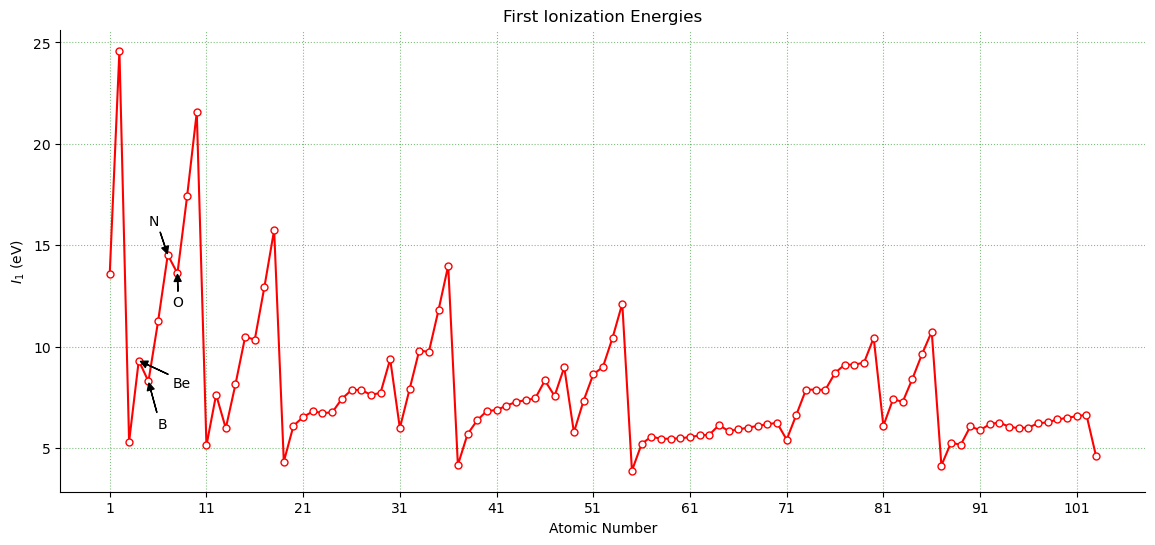

In [10]:
plt.figure(figsize=(14,6))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies')

plt.xlabel('Atomic Number')
plt.ylabel('$I_1$ (eV)')

plt.xticks(np.arange(1, 104, 10))

plt.grid(linestyle=':', color='green', alpha=0.5)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

arrowset = dict(facecolor='black', width=0.1, headwidth=5, headlength=5, shrink=0.05) # this can save a lot of typing when using the same arrowprops for multiple annotations

# Add annotations for Be and B
plt.annotate('Be', xy=(4, 9.321), xytext=(7.5, 8), arrowprops=arrowset)
plt.annotate('B', xy=(5, 8.297), xytext=(6, 6), arrowprops=arrowset)

# Add annotations for N and O
plt.annotate('N', xy=(7, 14.530), xytext=(5, 16), arrowprops=arrowset)
plt.annotate('O', xy=(8, 13.620), xytext=(7.5, 12), arrowprops=arrowset)

plt.savefig('first_ionization_energy.pdf')

Some of the arguments of `plt.annotate` and `arrowprops` are listed in tables below.

- Key arguments of `plt.annotate`

| Argument     | Type / Example         | Description                                                                 |
|--------------|------------------------|-----------------------------------------------------------------------------|
| `text`       | `'Label'`              | The annotation text to display.                                             |
| `xy`         | `(x, y)`               | Coordinates of the point being annotated.                                   |
| `xytext`     | `(x_text, y_text)`     | Position of the annotation text. If omitted, text appears at `xy`.          |
| `arrowprops` | `dict(...)`            | Dictionary of properties to draw an arrow from text to the annotated point. |

- Common keys for `arrowprops`

| Key          | Type / Example | Description                                        |
|--------------|----------------|----------------------------------------------------|
| `width`      | `1.5`          | Thickness of the arrow line.                       |
| `headwidth`  | `2`            | Width of the base of the arrow head.               |
| `headlength` | `5`            | Length of the arrow head.                          |
| `shrink`     | `0.05`         | Fraction of total length to shrink from both ends. |

Besides these, common arguments like `color` can also be used here.

### Arbitrary Texts

Putting arbitrary texts on a plot is quite similar to putting annotations. The only difference is that you need to use the `plt.text()` function instead of `plt.annotate()`. The syntax of `plt.text()` is a little bit different from `plt.annotate()`, but you can imagine that some parameters should be similar:

```python
plt.text(x, y, text, ...)
```
The first two arguments are the x- and y-coordinates of the text, the third one is the text string. There are more optional arguments to control the display of texts. For more information, you can refer to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

Let's use the previous figure as an example.

```python
plt.figure(num = 1, figsize=(14,6))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies')

plt.xlabel('Atomic Number')
plt.ylabel('$I_1$ (eV)')

plt.xticks(np.arange(1, 104, 10))

plt.grid(linestyle=':', color='green', alpha=0.5)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.text(21, 8.75, '1st TM region', fontstyle='italic', fontsize=8, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))
plt.text(38.25, 9, '2nd TM region', fontstyle='italic', fontsize=8, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))

plt.show()
```

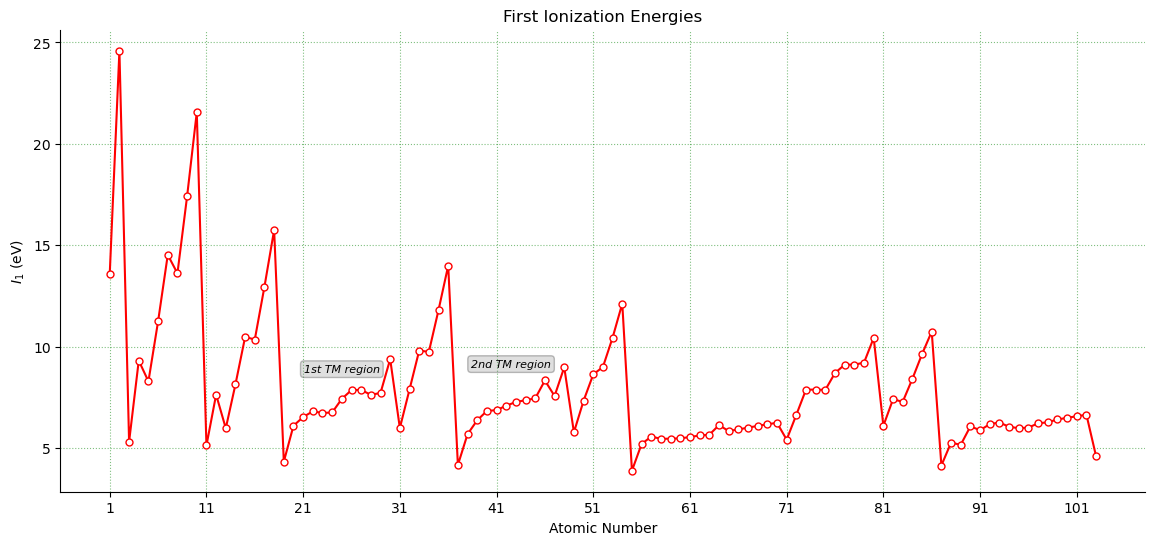

In [11]:
plt.figure(figsize=(14,6))

plt.plot(ie1[0:,0], ie1[0:,1], color='red', marker='o', mfc='white', ms=5)
plt.title('First Ionization Energies')

plt.xlabel('Atomic Number')
plt.ylabel('$I_1$ (eV)')

plt.xticks(np.arange(1, 104, 10))

plt.grid(linestyle=':', color='green', alpha=0.5)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.text(25, 8.75, '1st TM region', fontstyle='italic', ha='center', fontsize=8, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))
plt.text(42.5, 9, '2nd TM region', fontstyle='italic', ha='center', fontsize=8, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))

plt.show()

Note that the `bbox` argument is used to draw a box around the text. Arguments of `bbox` can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html#matplotlib.patches.FancyBboxPatch).

### Other Types of Plots

#### Histograms

So far, the plots we made are all scatter or line plots. There are many other types of plots that can be useful for visualizing data. For example, if you want to know the distribution of the $I_1$ values, you can make a [histogram](https://en.wikipedia.org/wiki/Histogram). To do this, you can use the `plt.hist()` function. Like `plt.plot()` for making regular plots, this function also takes several arguments:
```python
plt.hist(x, bins, range, density, weight, ...)
```
The summary of these arguments is listed below.

| Argument     | Type / Example                                    | Description                                                                                                                                                                    |
|--------------|---------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `x`          | array-like                                        | Input data to be histogrammed.                                                                                                                                                 |
| `bins`       | `10`, `[0, 1, 2, 3]`, `'auto'`                    | Number of bins or sequence of bin edges; `'auto'` lets NumPy decide.                                                                                                           |
| `range`      | `(xmin, xmax)`                                    | Lower and upper range of bins. If not provided, defaults to data min/max.                                                                                                      |
| `density`    | `True` / `False`                                  | If `True`, normalize so the area under the histogram equals 1.                                                                                                                 |
| `weights`    | array-like, same shape as  `x`                    | Weights for each value in `x`. Useful for weighted histograms.                                                                                                                 |
| `cumulative` | `True` / `False`                                  | If `True`, build a [cumulative histogram](https://en.wikipedia.org/wiki/Histogram#Cumulative_histogram:~:text=without%20using%20kernels.-,Cumulative%20histogram,-%5Bedit%5D). |
| `histtype`   | `'bar'`, `'barstacked'`, `'step'`, `'stepfilled'` | [Type of histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#:~:text=histtype%7B%27bar%27%2C%20%27barstacked,by%20default%20filled.) to draw.                                                                                                                                                 |

Other common arguments like `color` can also be used here. You can find the full list of arguments in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).


Here we will illustrate this function by making a histogram of the $I_1$ values.

```python
plt.hist(ie1[0:,1], bins=50, edgecolor='black', linewidth=1) # edgecolor corresponds to the color of the border of the histogram, and linewidth corresponds to the thickness of the border
plt.xlabel('$I_1$ (eV)')
plt.ylabel('Numbers of Elements')
plt.show()
```

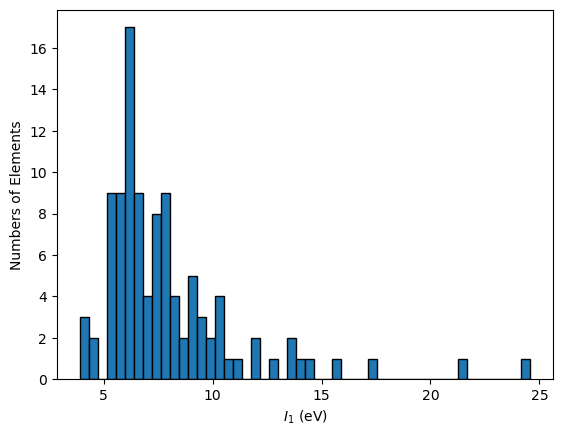

In [12]:
plt.hist(ie1[0:,1], bins=50, edgecolor='black', linewidth=1) # edgecolor corresponds to the color of the border of the histogram, and linewidth corresponds to the thickness of the border
plt.xlabel('$I_1$ (eV)')
plt.ylabel('Numbers of Elements')
plt.show()

It can be seen that the distribution of $I_1$ values is skewed to the right. This is because the first ionization energies of some of the noble gases are much higher than the rest.

#### Bar Plots

We can even make a bar plot of the $I_1$ values. For clarity, we will use the first 10 elements. The detail of the arguments of `plt.bar()` can be accessed in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Also, we referenced the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html) of `plt.tick_params()` to remove the tick marks on the x-axis.
```python
elem_10 = np.array(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'])

plt.bar(elem_10, ie1[0:10,1])
plt.tick_params(axis='x', color='None') # remove tick marks on the x-axis
plt.ylabel('$I_1$ (eV)')
plt.show()
```

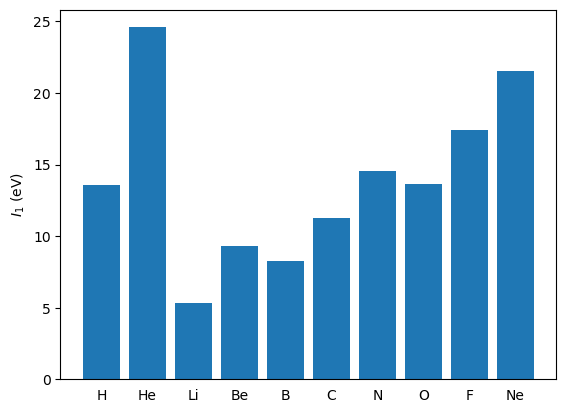

In [13]:
elem_10 = np.array(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'])

plt.bar(elem_10, ie1[0:10,1])
plt.tick_params(axis='x', color='None') # remove tick marks on the x-axis
plt.ylabel('$I_1$ (eV)')
plt.show()

#### Error Bars

Sometimes we want to plot the error along with the data, and this can be achieved by `plt.errorbar()` function. See the errorbar [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) for more information. We will not use the same data ($I_1$) for illustration but rather use a simple dataset. Here we use a quadratic function with error increasing proportionally to the input.

```python
x = np.linspace(0,10,10)
y = x ** 2
y_err = 2*x

plt.errorbar(x, y, marker='o', linestyle='-', yerr=y_err)
plt.show()
```

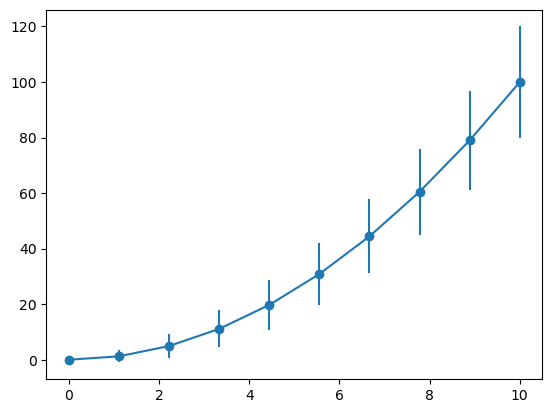

In [14]:
x = np.linspace(0,10,10)
y = x ** 2
y_err = 2*x

plt.errorbar(x, y, marker='o', linestyle='-', yerr=y_err)
plt.show()

There are tons of other types of plots that can be used to visualize data. The types we have covered here are not exhaustive. We wouldn't go through all of them in this lesson, but you can find more types in the [documentation](https://matplotlib.org/stable/plot_types/). Also, don't forget that GenAIs are your best friends! If you have any questions regarding plotting, you can ask AI at any time.

By the way, I will show you a last example of making a mass spectrum plot, which is one of my favorite plots(*≧ω≦)

The code below plots a mass spectrum of melatonin ([Spectral Database for Organic Compounds SDBS, AIST](https://sdbs.db.aist.go.jp/CompoundLanding.aspx?sdbsno=13372)) using `plt.vlines()`:
```python
ms = np.loadtxt('melatonin.csv', delimiter=',')
ms_mz = ms[0:,0]
ms_int = ms[0:,1]

plt.figure(figsize=(18,9))

# Full spectrum
plt.subplot(3, 1, 1)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.ylim(bottom=0)
plt.xticks(np.arange(0,251,10))
plt.xticks(np.arange(0,251,1), minor=True)

# Zoom 230–235
plt.subplot(3, 1, 2)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.xlim(230, 235)
plt.ylim(bottom=0)
plt.xticks(np.arange(230,235.1,0.5))
plt.xticks(np.arange(230,235.1,0.1), minor=True)

# Zoom 150-180
plt.subplot(3, 1, 3)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.xlim(150, 180)
plt.ylim(bottom=0)
plt.xticks(np.arange(150,180.1,1))
plt.xticks(np.arange(150,180.1,0.1), minor=True)
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig('mass_spectrum.pdf')
```

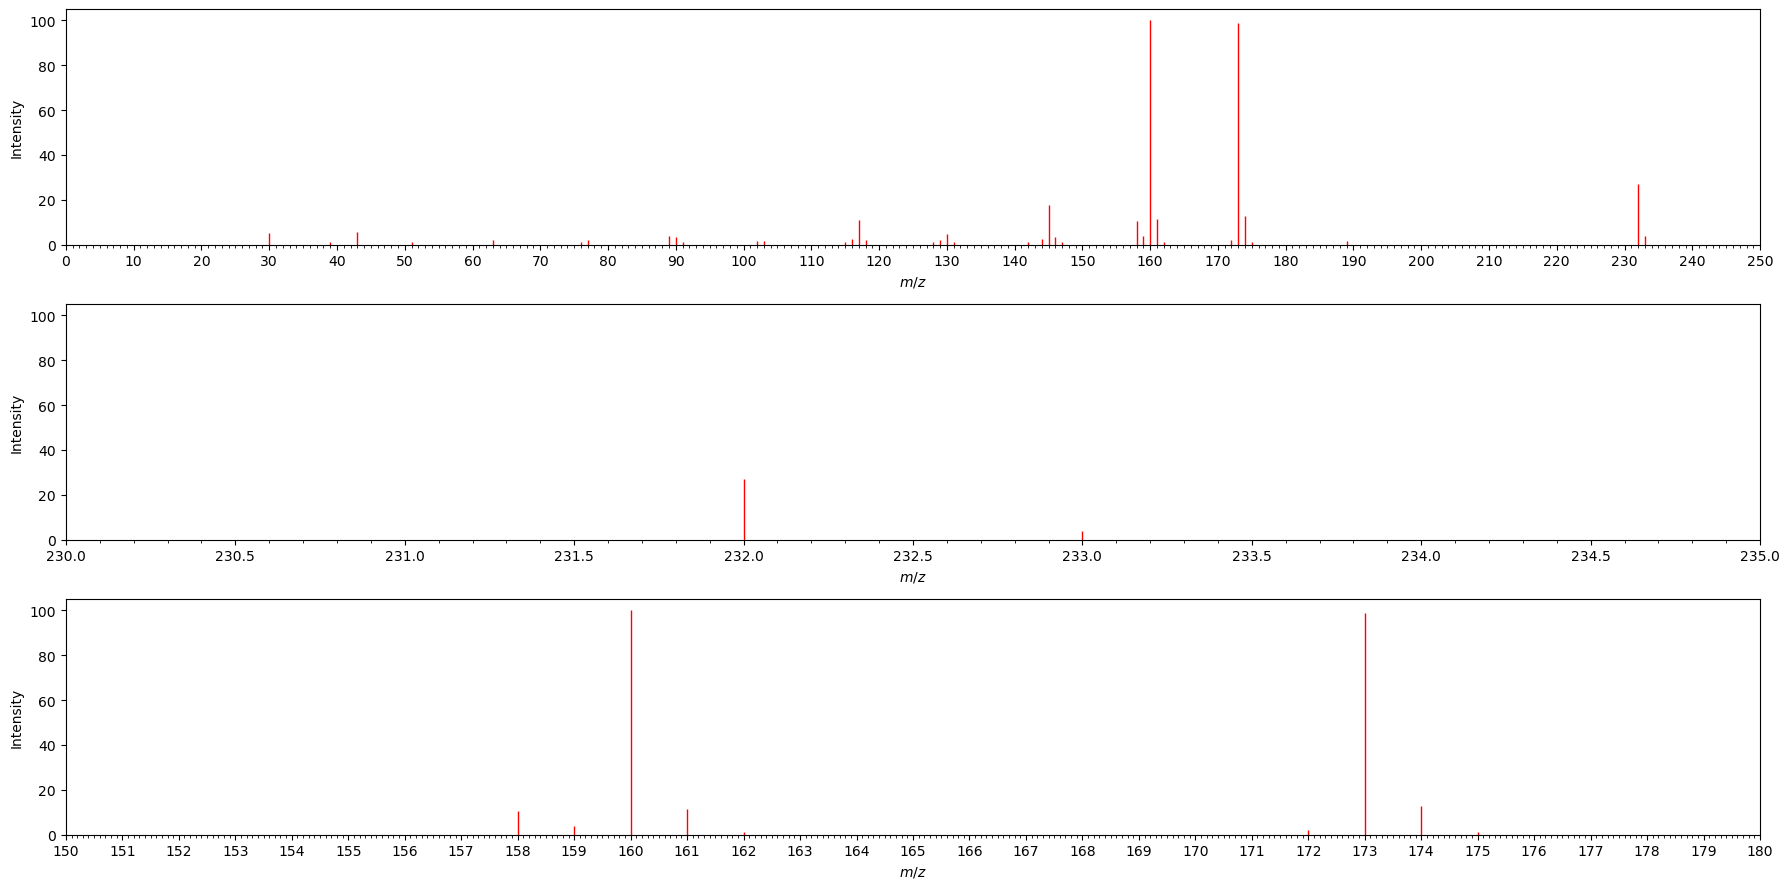

In [15]:
ms = np.loadtxt('melatonin.csv', delimiter=',')
ms_mz = ms[0:,0]
ms_int = ms[0:,1]

plt.figure(figsize=(18,9))

# Full spectrum
plt.subplot(3, 1, 1)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.ylim(bottom=0)
plt.xticks(np.arange(0,251,10))
plt.xticks(np.arange(0,251,1), minor=True)

# Zoom 230–235
plt.subplot(3, 1, 2)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.xlim(230, 235)
plt.ylim(bottom=0)
plt.xticks(np.arange(230,235.1,0.5))
plt.xticks(np.arange(230,235.1,0.1), minor=True)

# Zoom 150-180
plt.subplot(3, 1, 3)
plt.vlines(ms_mz, ymin=0, ymax=ms_int, color='red', linewidth=1)
plt.xlabel('$m/z$')
plt.ylabel('Intensity')
plt.xlim(150, 180)
plt.ylim(bottom=0)
plt.xticks(np.arange(150,180.1,1))
plt.xticks(np.arange(150,180.1,0.1), minor=True)
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig('mass_spectrum.pdf')

## Stats 101

Statistics is the central in data science. You may have studied statistics in your previous courses. Here we will give a brief introduction to statistics in Python. If you want to learn more, we will have a subsequent Lesson 4.5 for more about statistics!

### Discrete Statistical Quantities

Before we start to introduce any statistical quantities, let's do a brief review (or quick preview if you haven't seen some of them before!).

#### Mean

[Mean](https://en.wikipedia.org/wiki/Mean) represents the average value of a dataset. There are several kinds of means, but the most widely used one is the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) ($\bar{x}$ or $\mu$), which is calculated by summing all data points and dividing by the total number of points. It provides a simple measure of the central tendency and is especially useful when the data are symmetrically distributed without extreme outliers. It is mathematically defined as
$$ \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i = \frac{x_1 + x_2 + \cdots + x_N}{N} $$
where $N$ is the number of data points and $x_i$ are the individual data points.

#### Weighted Mean

In many experiments, some measurements are more reliable than others. For instance, when averaging repeated absorbance readings from a spectrophotometer, you might assign higher weight to measurements taken with longer integration time (lower noise) and lower weight to quick scans (higher noise). In such cases, we use the [weighted (arithmetic) mean](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean), which accounts for the relative importance of each data point. The formula is:
$$ \bar{x}_w = \frac{\sum_{i=1}^{N} w_i x_i}{\sum_{i=1}^{N} w_i} = \frac{w_1x_1 + w_2x_2 + \cdots + w_Nx_N}{w_1 + w_2 + \cdots + w_N} $$
where $x_i$ are the data points and $w_i$ are their weights. If all weights are equal ($w_i = 1$), the weighted mean reduces to the ordinary arithmetic mean. This makes the weighted mean a natural generalization of the mean that adapts to real experimental conditions.

#### Median

[Median](https://en.wikipedia.org/wiki/Median) is the middle value of a dataset when the data are arranged in ascending order. If there is an even number of points, it is the average of the two central values. The median is less sensitive to outliers than the mean.

#### Variance

[Variance](https://en.wikipedia.org/wiki/Variance) ($\sigma^2$) is a measure of how spread out the data are. It is defined as the average of the squared deviations from the mean. A higher variance means the data points are more widely dispersed. The calculation of variance is somehow different for a **population** versus a **sample**:
- For a population variance ($\sigma_p^2$ or $s_N^2$), we assume that <u>all possible data points are known</u>. The variance is given by
$$ \sigma^2_p = s_N^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2 = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \cdots + (x_N - \bar{x})^2}{N} $$
where $N$ is the number of data points, $x_i$ are the individual data points, and $\bar{x}$ is the mean.
- For a sample variance ($\sigma_s^2$ or $s^2$), we only have a <u>subset of the population</u>. To avoid underestimating the spread, we divide by $N-1$ instead of $N$:
$$ \sigma^2_s = s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2 = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \cdots + (x_N - \bar{x})^2}{N-1} $$
This correction ensures that the sample variance is an unbiased estimator of the true population variance. See [Wikipedia of variance](https://en.wikipedia.org/wiki/Variance#:~:text=X%20are%20finite.-,Population%20variance%20and%20sample%20variance,-%5Bedit%5D) for more information.

#### Standard Deviation

[Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) ($\sigma$) is simply the (non-negative) square root of the variance. It has the same units as the data and provides a more intuitive sense of how much typical data points deviate from the mean. The calculation of standard deviation follows the same idea for population and sample:
- For a population, the standard deviation is
$$ \sigma_p = s_N = \sqrt{\sigma_p^2} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2} = \sqrt{\frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \cdots + (x_N - \bar{x})^2}{N}} $$
- For a sample, the standard deviation is
$$ \sigma_s = s = \sqrt{\sigma_s^2} = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2} = \sqrt{\frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \cdots + (x_N - \bar{x})^2}{N-1}} $$

It's pretty straightforward to get common statistical quantities in Python. Python itself has a built-in `statistics` module, which provides functions for calculating mean, median, standard deviation, and more, see the [Python Documentation](https://docs.python.org/3/library/statistics.html). However, in practice, we usually rely on NumPy and SciPy, since they offer better support for arrays and a wider range of features. Some common NumPy functions include:

| Function         | Description                                                        |
|------------------|--------------------------------------------------------------------|
| `np.min` / `np.max` | Minimum / maximum of array elements.                                |
| `np.percentile`  | Compute the q-th percentile of the data along the specified axis.   |
| `np.quantile`    | Compute quantiles of the data.                                      |
| `np.median`      | Compute the median (50th percentile).                               |
| `np.mean`       | Arithmetic mean.                                                    |
| `np.average`    | Weighted average.                                                   |
| `np.std`        | Standard deviation.                                                 |
| `np.var`        | Variance.                                                           |

Many of these functions also have versions that ignore `NaN` values. See [NumPy documentation](https://numpy.org/doc/stable/reference/routines.statistics.html) for a complete list.

SciPy provides a more comprehensive set of statistical functions with much richer functionalities, such as weighted geometric mean, weighted harmonic mean, weighted power mean, mode, standard error of the mean... See [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics:~:text=for%20masked%20arrays.-,Summary%20statistics,-%23) for a complete list.

<span style="color:green">**Exercise**:</span> The relative energies (compared to the lowest-energy conformer) and populations (in percentage) of [conformational isomers](https://en.wikipedia.org/wiki/Rotamer) (also called conformers or rotamers) of fructopyranose, calculated using [GOAT](https://www.faccts.de/docs/orca/6.0/manual/contents/typical/GOAT.html)-[xTB](https://xtb-docs.readthedocs.io/en/latest/), are stored in the file `conformer_data.csv`. Load this dataset and compute the <u>weighted</u> average relative energy of fructopyranose. Try to read the documentation to understand how to add weights to the average!

In [16]:
conformer = np.loadtxt('conformer_data.csv', delimiter=',', skiprows=1)
conformer_energy = conformer[:,0]
conformer_pop = conformer[:,1]/100

print(np.average(conformer_energy, weights=conformer_pop))

0.8819745898359344


<span style="color:green">**Exercise**:</span> Calculate the standard deviation of the ionization energies for the first-row transition metals and for the second-row transition metals using the preloaded variable `ie1`. Then compare the two values to see which is larger.

<span style="color:green">**Exercise**:</span> A <u>sampling</u> study was conducted on a group of students solving number theory problems in a short quiz. We want to determine the average time (in minutes) that students spent on this quiz. The data are given as:

```python
time_on_quiz = np.array([
    6.24, 4.65, 6.62, 8.81, 4.41,
    4.41, 8.95, 6.92, 3.83, 6.36,
    3.84, 3.84, 5.60, 0.22, 0.69,
    3.59, 2.47, 5.79, 2.73, 1.47
])
```

Calculate the mean and standard deviation of the time spent on the quiz, treating these data as a sample. Here the is idea that we _use a sample to estimate the population_, so set the [delta degree of freedom](https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=for%20more%20details.-,ddof,-%7Bint%2C%20float%7D%2C%20optional) parameter to `ddof=1` when computing the standard deviation.

In [17]:
time_on_quiz = np.array([
    6.2, 4.7, 6.6, 8.8, 4.4,
    4.4, 9.0, 6.9, 3.8, 6.4,
    3.8, 3.8, 5.6, 5.2, 0.7,
    3.6, 2.5, 5.8, 2.7, 1.5
])
print(f'Mean: {np.mean(time_on_quiz):.1f} min')
print(f'Standard Deviation: {np.std(time_on_quiz, ddof=1):.1f} min')

Mean: 4.8 min
Standard Deviation: 2.2 min


The quiz was designed to be completed in 5 minutes. Is the average time spent by these students close to this target? What conclusions can you draw about the students' ability from these results?

### Normal Distribution

We often hear phrases like "within $3\sigma$", "within a standard deviation"... but how do these descriptions correspond to a proportion (percentage) of the population? In most cases, we are assuming that the data are **normally distributed**—that is, the data follows a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). In this case, about 68% of the population lies within one standard deviation ($1\sigma$) of the mean, as shown in the figure below.

<img src="./Standard_deviation_diagram_micro.svg" alt="Normal Distribution" width="50%" style="display=block; margin:auto"/>

The normal distribution is often referred to as the "bell curve" because of its characteristic shape. In statistics, we often denote the normal distribution as $N(\mu, \sigma^2)$ or $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ is the mean and $\sigma$ is the standard deviation. Thus, when a random variable $X$ is normally distributed with mean and standard deviation $\sigma$, we can express as $X \sim \mathcal{N}(\mu, \sigma^2)$.

SciPy provides an object called `norm` in the submodule `scipy.stats`. This object supports a wide range of operations for working with the normal distribution. For example, we can compute the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) of a normal distribution—that is, the **value of the distribution at a given point**—using `norm.pdf`. The PDF is defined as
$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
where $\mu$ is the mean and $\sigma$ is the standard deviation. The function call `norm.pdf(x, loc=0, scale=1)` evaluates the PDF at a value $x$, where `loc` corresponds to the mean $\mu$ and `scale` corresponds to the standard deviation $\sigma$.

The code below calculates the probability density of a normal distribution with mean $0$ and standard deviation $1$ at $x=1$, which lies one standard deviation ($1\sigma$) to the right of the mean.

```python
from scipy.stats import norm
norm.pdf(10)
```

In [18]:
from scipy.stats import norm
norm.pdf(1)

np.float64(0.24197072451914337)

Probably more useful is the function `norm.cdf`, which calculates the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) of a normal distribution. The CDF gives the probability that a random variable is less than or equal to a given value; i.e., the **area under the normal distribution curve** up to $x$. It is defined as
$$ F(x) = \frac{1}{2} \left[1 + \mathrm{erf} \left( \frac{x-\mu}{\sqrt{2\sigma^2}} \right) \right] = \frac{1}{2} \left[ 1 + \frac{2}{\sqrt{\pi}} \int_{0}^{\frac{x-\mu}{\sqrt{2\sigma^2}}} e^{-t^2} \, dt \right]$$
where $\mathrm{erf}$ is the [error function](https://en.wikipedia.org/wiki/Error_function). Try the following code for finding the probability of finding a random variable with a value less than or equal to $x=0$ (from $-\infty$ to center) in a normal distribution with mean $0$ and standard deviation $1$.

```python
norm.cdf(0)
```

In [19]:
norm.cdf(0)

np.float64(0.5)

We can also evaluate the CDF at two points, say $x=-1$ and $x=1$, and subtract the two values to get the probability that a random variable is between $-1$ and $1$ (within $\pm 1\sigma$).

```python
norm.cdf(1) - norm.cdf(-1)
```

In [20]:
norm.cdf(1) - norm.cdf(-1)

np.float64(0.6826894921370859)

The result is about 0.68, or 68%, which matches the value shown in the figure at the beginning of this subsection.

Of course, there are many other types of distributions as well, and we will cover them in Lesson 4.5.

<span style="color:green">**Exercise** (this is a great one—it demonstrates one of the most important theorems in statistics!):</span> The **[central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT)** states that the distribution of the sample mean from a large number of independent random variables will approach a normal distribution, regardless of the original distribution of the variables.

In this exercise, we will verify this theorem by calculating the sum of `n` random variables, each variable is drawn from a [uniform distribution](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Inferential_Statistics_and_Probability_-_A_Holistic_Approach_(Geraghty)/07%3A_Continuous_Random_Variables/7.03%3A_Uniform_Distribution) from $0$ to $1$ (as its name suggests, the random variables are uniformly distributed between $0$ and $1$). The following code imports a customized script that can plot an interactive figure with a normal curve and the sum of `n` random variables. You can check to the `clt.py` file in the same path to see how it works.

```python
import clt
```

In [21]:
import clt
clt.show_plot()

interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function clt.make_plot(n: int = 1)>

Try to adjust the slider to see how the histogram changes compared to the reference normal curve as `n` increases. Do you think the CLT holds for this case? What about _for other distributions_? You may try to change the script `clt.py` to use other distributions once you think you understand the code.

## >>> Random Numbers

We often need to generate random numbers for simulations, data analysis, and other purposes... (to be continued)

## Fitting

Do you remember in the last lesson on data visualization when Van Nya made a rather poor attempt at fitting the molar absorptivity of methylene blue? As it turns out, he wasn't even measuring methylene blue, but some other unknown compound. In that case, how can we determine the molar absorptivity of this mystery species? The key is to **fit** the data to a straight line and use the slope to get the molar absorptivity. This is exactly what the machinery of fitting, which we'll introduce in this section, is designed to do.

### Linear Fitting

For fitting the molar absorptivity, it's easy to just perform a **linear fitting** (or **[linear regression](https://en.wikipedia.org/wiki/Linear_regression)**) since Beer's law is a linear equation.

$$ A = \varepsilon c l$$

We will use a function called `np.polyfit()` to perform the fitting. The function takes the following arguments:

```python
np.polyfit(x, y, deg, cov)
```
Here `x` and `y` are the data sets, and `deg` is the degree of the polynomial to fit. The optional argument `cov` is used to calculate the _covariance matrix_ of the fitted parameters, which will be covered later.

Let's take a look of the data from the last lesson:

```python
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3

fit = np.polyfit(data_conc, data_absor, deg=1)
fit
```

In [22]:
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3

fit = np.polyfit(data_conc, data_absor, deg=1)
fit

array([ 1.03904468e+05, -7.71631497e-02])

The return values of `np.polyfit()` are the coefficients of the fitting equation. The first element of the return value is the **slope** of the fitting line, and the second element is the **intercept** of the fitting line. Let's plot the data and the fitting line to see how well the fitting line fits the data.

```python
fit_x = np.linspace(0, 40e-6, 100)
fit_y = fit[0] * fit_x + fit[1]

plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

# This part displays the equation of the fitting line
equation = f'$y = ({fit[0]:.3g})x + ({fit[1]:.3g})$'
plt.text(2.3e-5, 2, equation) # the first two arguments are the x and y coordinates of the text, and the third argument is the text to display

plt.legend()

plt.show()
```

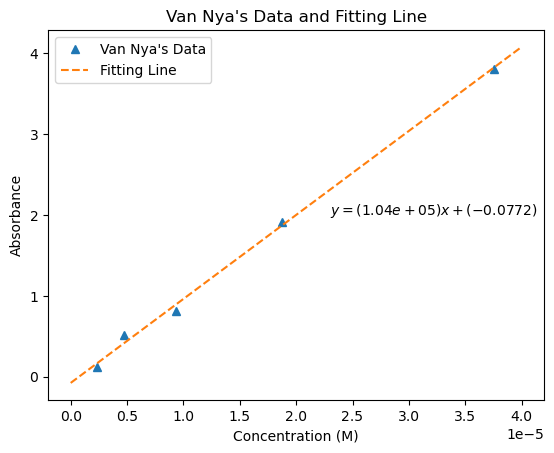

In [23]:
fit_x = np.linspace(0, 40e-6, 100)
fit_y = fit[0] * fit_x + fit[1]

plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

# This part displays the equation of the fitting line
equation = f'$y = ({fit[0]:.3g})x + ({fit[1]:.3g})$'
plt.text(2.3e-5, 2, equation) # the first two arguments are the x and y coordinates of the text, and the third argument is the text to display

plt.legend()

plt.show()

_If you are not familiar with the code like `f'$y = ({fit[0]:.3g})x + ({fit[1]:.3g})$'`, it's time to go back to Lesson 1.5 to learn how to use the string formatting feature of Python!_

According to the fitting line, the molar absorptivity of the unknown compound is about $1.04 \times 10^5\, \mathrm{L \cdot mol^{-1} \cdot cm^{-1}}$. You will notice a nonzero intercept, but it's tiny compared to the slope, so it won't be a concern.

Sometimes we want to know the uncertainty of the fitting parameters. We can use the `np.polyfit()` function again, but this time we will set the optional argument `cov` to `True`. The return value of `np.polyfit()` will be a tuple of two arrays, which contain the coefficients and the covariance matrix of the fitting parameters.

```python
fit, cov = np.polyfit(data_conc, data_absor, deg=1, cov=True)
fit, cov
```

In [24]:
fit, cov = np.polyfit(data_conc, data_absor, deg=1, cov=True)
fit, cov

(array([ 1.03904468e+05, -7.71631497e-02]),
 array([[ 9.55759862e+06, -1.38948369e+02],
        [-1.38948369e+02,  3.58437493e-03]]))

The covariance matrix of the fitting parameters is a 2D array with shape `(deg + 1, deg + 1)`. The diagonal elements of the matrix are the [variances](https://en.wikipedia.org/wiki/Variance) of the fitting parameters, and the off-diagonal elements are the [covariances](https://en.wikipedia.org/wiki/Covariance) between the fitting parameters. Commonly, we use the diagonal elements to get the standard deviations of the fitting parameters by taking the square root of them:

```python
std_fit = np.sqrt(np.diag(cov)) # `np.diag()` returns the diagonal elements of an array
std_fit
```

In [25]:
std_fit = np.sqrt(np.diag(cov)) # `np.diag()` returns the diagonal elements of an array
std_fit

array([3.09153661e+03, 5.98696495e-02])

Then, you can attach the standard deviations to the fitting parameters and display them in a figure.

```python
plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

equation = f'$y = ({fit[0]:.3g} \pm {std_fit[0]:.3g})x + ({fit[1]:.3g} \pm {std_fit[1]:.3g})$'
plt.text(2.3e-5, 2, equation)

plt.legend()

plt.show()
```

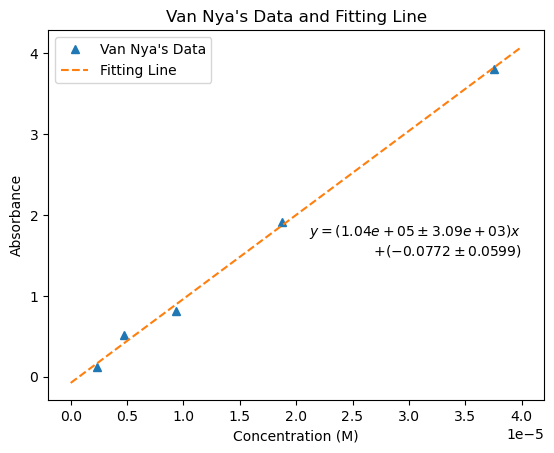

In [26]:
plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

equation = f'$y = ({fit[0]:.3g} \pm {std_fit[0]:.3g})x$ \n $+ ({fit[1]:.3g} \pm {std_fit[1]:.3g})$'
plt.text(4e-5, 1.5, equation, ha='right') # if you include `ha='right'`, the text will be aligned to the right

plt.legend()

plt.show()

In addition, sometimes we also want to know the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$ score) of the fitting. The higher the $R^2$ score, the better the fitting. Unfortunately, `np.polyfit()` doesn't have a function to return the $R^2$ score directly, so we will implement a function `r2_score()` from another famous library for machine learning: [Scikit-learn](https://scikit-learn.org/stable/index.html). The details of the `r2_score()` function can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

```python
from sklearn.metrics import r2_score

y_pred = fit[0] * data_conc + fit[1]
R2 = r2_score(data_absor, y_pred)
R2
```

In [27]:
from sklearn.metrics import r2_score

y_pred = fit[0] * data_conc + fit[1]
R2 = r2_score(data_absor, y_pred)
R2

0.9973511966743935

Plotting together, we have:

```python
plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

equation = f'$y = ({fit[0]:.3g} \pm {std_fit[0]:.3g})x$ \n $+ ({fit[1]:.3g} \pm {std_fit[1]:.3g})$ \n $R^2 = {R2:.3g}$'
plt.text(4e-5, 1.5, equation, ha='right')

plt.legend()

plt.show()
```

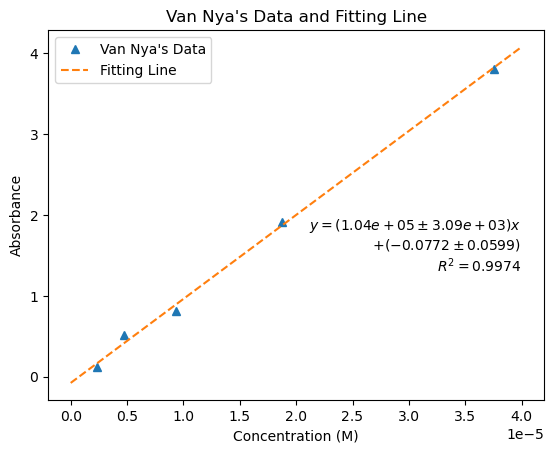

In [28]:
plt.plot(data_conc, data_absor, marker='^', linestyle='', label='Van Nya\'s Data')
plt.plot(fit_x, fit_y, linestyle='--', label='Fitting Line')

plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Van Nya\'s Data and Fitting Line')

equation = f'$y = ({fit[0]:.3g} \pm {std_fit[0]:.3g})x$ \n $+ ({fit[1]:.3g} \pm {std_fit[1]:.3g})$ \n $R^2 = {R2:.4g}$'
plt.text(4e-5, 1.3, equation, ha='right')

plt.legend()

plt.show()

### Polynomial Fitting

The `np.polyfit()` function can also be used to fit a polynomial with degree greater than 1. For example, we can fit a free-fall model to the data of the free-falling of a ball. Recall that the free-falling equation is:
$$ h(t) = -\frac{1}{2}gt^2 + v_0t + h_0$$
Here $h(t)$ is the height of the ball, $t$ is the time, $g$ is the acceleration due to gravity, $v_0$ is the initial velocity, and $h_0$ is the initial height.

Suppose that we want to find the values of $g$. Here, we will use this dataset from [Khan Academy](https://www.khanacademy.org/science/ap-college-physics-1/xf557a762645cccc5:kinematics/xf557a762645cccc5:mathematical-models-of-motion/a/free-fall).

```python
height = np.array([2.00, 1.90, 1.56, 0.92, 0.30])
time = np.array([0.00, 0.15, 0.28, 0.49, 0.58])

fffit, ffcov = np.polyfit(time, height, deg=2, cov=True)
fit_g = fffit[0] * (-2)

print(f'g = {fit_g:.2g} m/s^2')
```

In [29]:
height = np.array([2.00, 1.90, 1.56, 0.92, 0.30])
time = np.array([0.00, 0.15, 0.28, 0.49, 0.58])

fffit, ffcov = np.polyfit(time, height, deg=2, cov=True)
fit_g = fffit[0] * (-2)

print(f'g = {fit_g:.3g} m/s^2')

g = 9.91 m/s^2


Well, it seems that this data deviates from the true value, in which $g = 9.81\, \mathrm{m\cdot s^{-2}}$. Let's plot the data and the fitting line to see how well the fitting line fits the data.

```python
t_fit = np.linspace(0, 0.6, 100)
h_fit = fffit[0] * t_fit**2 + fffit[1] * t_fit + fffit[2]

plt.plot(time, height, 'x', marker='o', linestyle='', label='Data')
plt.plot(t_fit, h_fit, label='Fitting Curve')

plt.xlabel('Time (s)')
plt.ylabel('Height (m)')

plt.legend()
plt.show()
```

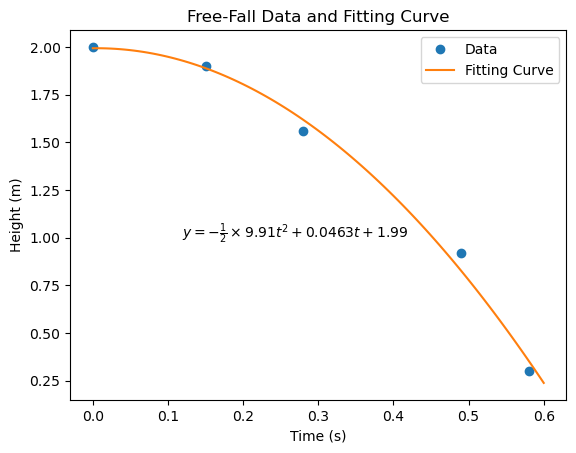

In [30]:
t_fit = np.linspace(0, 0.6, 100)
h_fit = fffit[0] * t_fit**2 + fffit[1] * t_fit + fffit[2]

plt.plot(time, height, marker='o', linestyle='', label='Data')
plt.plot(t_fit, h_fit, label='Fitting Curve')

plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Free-Fall Data and Fitting Curve')

eq2 = rf'$y = -\frac{{1}}{{2}} \times {fffit[0]*(-2):.3g}t^2 + {fffit[1]:.3g}t + {fffit[2]:.3g}$'
plt.text(0.42, 1, eq2, ha='right')

plt.legend()
plt.show()

It seems that the fitting line is not very good—probably because the dataset is too small (and has non-negligible errors!). Let's get the uncertainty by accessing the covariance matrix of the fitting parameters:

```python
std_fffit = np.sqrt(np.diag(ffcov))
std_fffit
```

In [31]:
std_fffit = np.sqrt(np.diag(ffcov))
std_fffit

array([1.15179181, 0.70704646, 0.08305284])

By principle of error propagation, we can get the standard deviation of $g$ by:
```python
std_g = std_fffit[0] * 2
std_g
```

In [32]:
std_g = std_fffit[0] * 2
std_g

np.float64(2.303583610363809)

Indeed, the standard deviation of $g$ is quite large. <u>Some people may still use $R^2$ to evaluate the goodness of nonlinear fitting, but it is somehow _NOT_ recommended</u>, see [_BMC Pharmacol._ **2010**, 10, 6](https://doi.org/10.1186/1471-2210-10-6). In any case, it is relatively safe to use standard deviations to evaluate the goodness of nonlinear fitting.

### Weighted Fitting

So far, the fitting has treated all data points equally. However, in some cases, we may want to assign different **weights** to certain data points. For instance, consider the [ideal gas law](https://en.wikipedia.org/wiki/Ideal_gas_law):

$$ pV = nRT $$

This equation describes the relationship between pressure, volume, and temperature for an _ideal gas_. It assumes that gas molecules are point particles with no intermolecular interactions. While this assumption is unrealistic, the model still provides a good approximation for the behavior of real gases—especially for <u>monatomic gases at high temperatures and low pressures</u>.

Suppose we have experimental data for a real gas, $\ce{CO2}$, including its pressure, volume, and standard deviation of pressure. The system contains $1\, \mathrm{mol}$ of gas at $25\, ^\circ \mathrm{C}$ ($298\, \mathrm{K}$). We want to fit the ideal gas law to this data to determine an effective gas constant $R_{\ce{CO2}}$ and compare it with the known ideal gas constant $R = 8.314\, \mathrm{J\cdot K^{-1}\cdot mol^{-1}}$. Let’s start by plotting the data:

```python
co2_data = np.loadtxt('CO2_vdw.csv', delimiter=',', skiprows=1)

plt.figure(figsize=(8, 5))
# Note that we take the reciprocal of the volume as the input, since p = nRT/V
plt.errorbar(1/co2_data[:, 0], co2_data[:, 1], yerr=co2_data[:,2],
             linestyle='', marker='o', mec='black', mfc='gold', capsize=4, ecolor='black')
plt.xlabel(r'$1/V\, (\mathrm{m}^3)$')
plt.ylabel(r'$P\, (\mathrm{Pa})$')
plt.title(r'Pressure vs. Volume of $ \mathrm{CO_2} $')
plt.grid(ls='--',alpha=0.8)
plt.show()
```

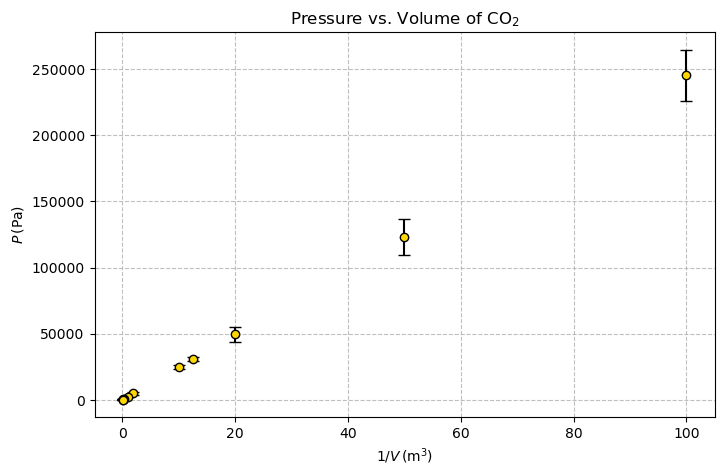

In [33]:
co2_data = np.loadtxt('CO2_vdw.csv', delimiter=',', skiprows=1)

plt.figure(figsize=(8, 5))
# Note that we take the reciprocal of the volume as the input, since p = nRT/V
plt.errorbar(1/co2_data[:, 0], co2_data[:, 1], yerr=co2_data[:,2],
             linestyle='', marker='o', mec='black', mfc='gold', capsize=4, ecolor='black')
plt.xlabel(r'$1/V\, (\mathrm{m}^3)$')
plt.ylabel(r'$P\, (\mathrm{Pa})$')
plt.title(r'Pressure vs. Volume of $ \mathrm{CO_2} $')
plt.grid(ls='--',alpha=0.8)
plt.show()

Now let's perform a linear fitting:

```python
co2_fit, co2_fit_uncer = np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True)
co2_fit[0], np.sqrt(np.diag(co2_fit_uncer))[0]
```

In [34]:
co2_fit, co2_fit_uncer = np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True)
co2_fit[0], np.sqrt(np.diag(co2_fit_uncer))[0]

(np.float64(2453.582535084163), np.float64(2.1479635271812967))

The initial results don't make sense. Recall that `np.polyfit()` with `deg=1` estimates a straight line with slope and intercept. In our case, the slope of the ideal gas law is:

$$ p = \frac{nRT}{V} = {\color{red}( \underbrace{nRT}_\text{slope})} \frac{1}{V} $$

Thus, to extract the gas constant, we must divide the fitted slope by $nT$. Since $n = 1\, \mathrm{mol}$, we only need to divide by $298$.

```python
co2_R = co2_fit[0] / 298
co2_R
```

In [35]:
co2_R = co2_fit[0] / 298
co2_R

np.float64(8.23349843987974)

Hmmm... This seems close to the ideal gas constant. Let's bring the standard deviation into this play:

```python
co2_stdev = np.sqrt(np.diag(co2_fit_uncer))[0] / 298
print(f'R_CO2 = ({co2_R:.3f} ± {co2_stdev:.3f}) J K^-1 mol^-1')
````

In [36]:
co2_stdev = np.sqrt(np.diag(co2_fit_uncer))[0] / 298
print(f'R_CO2 = ({co2_R:.3f} ± {co2_stdev:.3f}) J K^-1 mol^-1')

R_CO2 = (8.233 ± 0.007) J K^-1 mol^-1


The standard deviation of the fitted values is relatively small compared to the gas constant. However, even adding this deviation to $R_{\ce{CO2}}$ does not bring it close to the ideal gas constant $R = 8.314\, \mathrm{J \cdot K^{-1} \cdot mol^{-1}}$. The reason is clear: $\ce{CO2}$ is not an ideal gas. Still, real gases behave more ideally at lower pressures. This suggests that we should give <u>less weight to high-pressure data</u> and <u>more weight to low-pressure data</u>.

`np.polyfit()` has a parameter `w` that can be used to assign weights to the data points. This works the same way as described earlier in the section on [weighted mean](#weighted-mean). The parameter takes a 1D array of the same length as the number of data points. Each weight corresponds to a data point and scales its contribution to the fit. For example, if we want to give higher weight to the low-pressure data, we can set the weight to be $\frac{1}{P}$, where $P$ is the pressure. Let’s try this:

```python
co2_fit_inverse_P, co2_fit_uncer_inverse_P = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/co2_data[:, 1])
print(f'R_CO2 = ({co2_fit_inverse_P[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_P))[0]/298:.3f}) J K^-1 mol^-1')
```

In [37]:
co2_fit_inverse_P, co2_fit_uncer_inverse_P = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/co2_data[:, 1])
print(f'R_CO2 = ({co2_fit_inverse_P[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_P))[0]/298:.3f}) J K^-1 mol^-1')

R_CO2 = (8.290 ± 0.010) J K^-1 mol^-1


See? This time the fitted $R_{\ce{CO2}}$ is closer to the ideal gas constant. Is there a way to get even closer? We notice that the standard deviation of the pressure data, $\sigma_P$, is also larger at higher pressures, so we can use $\frac{1}{\sigma_P}$ as the weight—this is called [inverse-variance weighting](https://en.wikipedia.org/wiki/Inverse-variance_weighting), where the errors of the products `w[i]*y[i]`, with `w[i]` as the individual weight and `y[i]` as the data points, all have the same variance (and standard deviation).

```python
co2_fit_inverse_sigma, co2_fit_uncer_inverse_sigma = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/co2_data[:, 2])
print(f'R_CO2 = ({co2_fit_inverse_sigma[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_sigma))[0]/298:.3f}) J K^-1 mol^-1')
```

In [38]:
co2_fit_inverse_sigma, co2_fit_uncer_inverse_sigma = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/co2_data[:, 2])
print(f'R_CO2 = ({co2_fit_inverse_sigma[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_sigma))[0]/298:.3f}) J K^-1 mol^-1')

R_CO2 = (8.292 ± 0.009) J K^-1 mol^-1


This time the fitted $R_{\ce{CO2}}$ is even closer to the ideal gas constant. Furthermore, we can combine $\frac{1}{P}$ with the inverse of the standard deviation $\sigma_P$, giving $\frac{1}{P\sigma_P}$, and use this as the weight:

```python
co2_fit_inverse_ps, co2_fit_uncer_inverse_ps = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/(co2_data[:, 1]*co2_data[:, 2]))
print(f'R_CO2 = ({co2_fit_inverse_ps[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_ps))[0]/298:.3f}) J K^-1 mol^-1')
```

In [39]:
co2_fit_inverse_ps, co2_fit_uncer_inverse_ps = \
    np.polyfit(1/co2_data[:, 0], co2_data[:, 1], deg=1, cov=True, w=1/(co2_data[:, 1]*co2_data[:, 2]))
print(f'R_CO2 = ({co2_fit_inverse_ps[0]/298:.3f} ± \
{np.sqrt(np.diag(co2_fit_uncer_inverse_ps))[0]/298:.3f}) J K^-1 mol^-1')

R_CO2 = (8.307 ± 0.001) J K^-1 mol^-1


Now the fitted $R_{\ce{CO2}}$ is quite close to the ideal gas constant. While it isn't perfect, it's reasonable because $\ce{CO2}$ is, after all, not an ideal gas.

### Curve Fitting
`np.polyfit()` is only able to fit a polynomial. That is, a function in the form
$$ f(x) = \sum_i^n a_i x^i = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n $$

However, in reality, lots of functions are not polynomials. Recall the Morse potential we introduced in the last lesson:
$$V_\text{Morse}(r) = D_e \left( 1 - e^{-a \left( r - r_0 \right)} \right)^2$$

This is clearly not a polynomial, and it can't be turned into a simple linear (polynomial) form either. For fitting this potential, we will use the `curve_fit()` function from the SciPy library. First import the function:

```python
from scipy.optimize import curve_fit
```

In [40]:
from scipy.optimize import curve_fit

The `curve_fit(f, xdata, ydata, p0, sigma, ...)` function takes the following major arguments:
- `f`: the <u>function</u> to be fitted
- `xdata`: the x-coordinates of the data points
- `ydata`: the y-coordinates of the data points
- `p0`: the initial guess of the fitting parameters
- `sigma`: the uncertainties of the data points

The first three arguments are required, and the remaining are optional. More arguments can be found in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). The first step of using `curve_fit()` is to define the function to be fitted. Here, we will define the morse potential again:

```python
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2
```

In [41]:
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2

We are going to fit $D_e$, $a$, and $r_0$ for a $\ce{CO}$ molecule. The data was generated from a computation simulation at CCSD(T)/cc-pCVQZ level. Read the data from the file `CO_energy.csv`.

```python
data = np.loadtxt('CO_energy.csv', delimiter=' ')
r = data[:, 0] # angstrom
E_h = data[:, 1] # hartree
```

In [42]:
data = np.loadtxt('CO_energy.csv', delimiter=' ')
r = data[:, 0] # angstrom
E_h = data[:, 1] # hartree

Here the unit of energy is [hartree](https://en.wikipedia.org/wiki/Hartree). This is a commonly used unit in quantum chemistry, which has the relationship:
$$ 1\,\mathrm{hartree} = 27.211\,\mathrm{eV} = 2625.5\,\mathrm{kJ\cdot mol^{-1}} = 627.50 \,\mathrm{kcal\cdot mol^{-1}} = 219470\,\mathrm{cm^{-1}}$$

We need to convert the unit of energy from hartree to eV for further comparison. You can definitely multiply `E_h` by 27.211, but here we will provide with a more accurate way; that is, use a tabulated conversion factor from `scipy.constants`.
```python
from scipy.constants import physical_constants
factor, *_ = physical_constants['Hartree energy in eV'] # we use `, *_` to drop the rest of the tuple returned by `pyc['Hartree energy in eV']`
factor
```

In [43]:
from scipy.constants import physical_constants
factor, *_ = physical_constants['Hartree energy in eV'] # we use `, *_` to drop the rest of the tuple returned by `pyc['Hartree energy in eV']`
factor

27.211386245981

More constants can be found in the [documentation](https://docs.scipy.org/doc/scipy/reference/constants.html).

Now perform the conversion and shift the minimum to zero:
```python
E_eV = E_h * factor
E_eV -= np.min(E_eV)
E_eV
```

In [44]:
E_eV = E_h * factor
E_eV -= np.min(E_eV)
E_eV

array([23.63363971, 10.59522127,  3.93819645,  0.93523603,  0.        ,
        0.20255258,  0.99567959,  2.05863688,  3.20653016,  4.33566364,
        5.38618805,  6.30075567,  6.96457608,  7.25399964,  7.14223731])

Take a look first by visualizing the data:

```python
plt.plot(r, E_eV, marker='o', linestyle='', label='Data')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

plt.show()
```

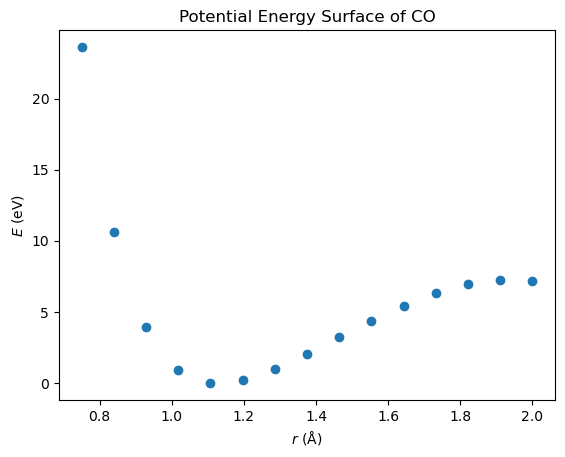

In [45]:
plt.plot(r, E_eV, marker='o', linestyle='', label='Data')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

plt.show()

We can now fit the Morse model.
```python
morse_fit = curve_fit(morse, r, E_eV, p0=(10, 1, 1)) # the initial guess was chosen for De=10, a=1, r0=1
morse_fit
```

In [46]:
morse_fit = curve_fit(morse, r, E_eV, p0=(10, 1, 1)) # the initial guess was chosen for De=10, a=1, r0=1
morse_fit

(array([9.68352287, 2.5322655 , 1.12175103]),
 array([[ 6.07740358e-02, -1.04780736e-02,  7.08290547e-04],
        [-1.04780736e-02,  2.29704147e-03, -1.86217462e-04],
        [ 7.08290547e-04, -1.86217462e-04,  1.75382996e-05]]))

The output is a tuple of two arrays. The first array is the fitting parameters, and the second array is the covariance matrix of the fitting parameters. We can check the standard deviation of the fitting parameters:
```python
std_morse_fit = np.sqrt(np.diag(morse_fit[1]))
std_morse_fit
```

In [47]:
std_morse_fit = np.sqrt(np.diag(morse_fit[1]))
std_morse_fit

array([0.24652391, 0.04792746, 0.00418788])

Now plot the data:

```python
r_fitted = np.linspace(0.8, 2.0, 100)
morse_fitted = morse(r_fitted, *morse_fit[0])

plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted, linestyle='-', label='Morse Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

plt.legend()
plt.show()
```

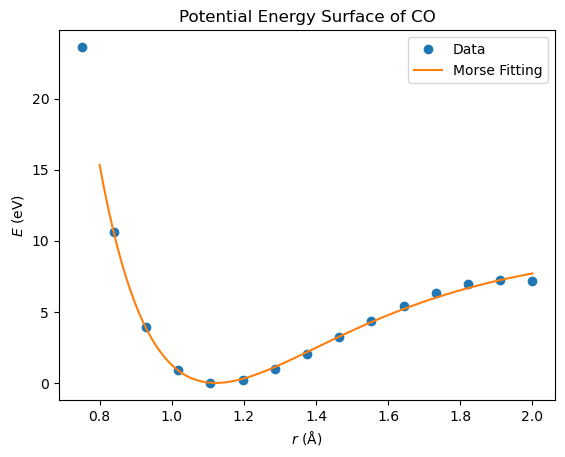

In [48]:
r_fitted = np.linspace(0.8, 2.0, 100)
morse_fitted = morse(r_fitted, *morse_fit[0])

plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted, linestyle='-', label='Morse Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

plt.legend()
plt.show()

We can also attach our fitted parameters to the plot:

```python
r_fitted = np.linspace(0.8, 2.0, 100)
morse_fitted = morse(r_fitted, *morse_fit[0])

plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted, linestyle='-', label='Morse Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

params_lines = [
    rf'$k = {morse_fit[0][0]:.3g} \pm {std_morse_fit[0]:.3g}$',
    rf'$a = {morse_fit[0][1]:.3g} \pm {std_morse_fit[1]:.3g}$',
    rf'$r_0 = {morse_fit[0][2]:.3g} \pm {std_morse_fit[2]:.3g}$',
]
params_text = '\n'.join(params_lines)

plt.text(1, 20, params_text, bbox=dict(boxstyle="round", ec='black', fc='orange', alpha=0.5))

plt.legend()
plt.show()
```

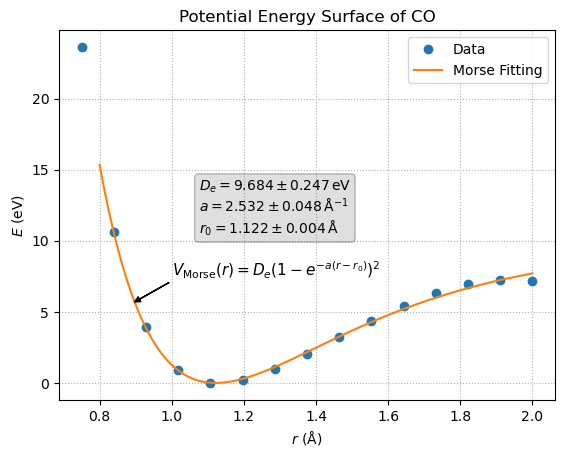

In [49]:
plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted, linestyle='-', label='Morse Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

# This part puts the fitted parameters on the plot, wrapped in a box
params_lines = [
    rf'$D_e = {morse_fit[0][0]:.3f} \pm {std_morse_fit[0]:.3f}\, \mathrm{{eV}}$',
    rf'$a = {morse_fit[0][1]:.3f} \pm {std_morse_fit[1]:.3f}\, \mathrm{{\AA}}^{{-1}}$',
    rf'$r_0 = {morse_fit[0][2]:.3f} \pm {std_morse_fit[2]:.3f}\, \mathrm{{\AA}}$',
]
params_text = '\n'.join(params_lines)

plt.text(1.075, 10.5, params_text, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))

morse_text = r'$V_\text{Morse}(r) = D_e \left( 1 - e^{-a \left( r - r_0 \right)} \right)^2$'
annotate_coords = (r_fitted[8], morse_fitted[8])
arrowset2 = dict(facecolor='black', width=0.01, headwidth=4, headlength=4)
plt.annotate(morse_text, annotate_coords, (1.0, 7.5), fontsize=11, fontweight='bold', arrowprops=arrowset2)

plt.grid(linestyle=':')

plt.legend()
plt.show()

For your information, the real data (collected from spectroscopy) is $D_e = 10.98\,\mathrm{eV}$, $a = 2.32\,\mathrm{Å}^{-1}$, and $r_0 = 1.128\,\mathrm{Å}$. Do you find any discrepancy between the fitted parameters and the real data (it might be significant)? If so, think about what might be the reasons.

In the example above, we fitted three parameters: $D_e$, $a$, and $r_0$. Sometimes a wide range of parameters is good, but in some cases, this can cause overfitting. In fact, we can also fit less parameters. For example, we can fit $D_e$ only, and pre-define the value of $a$ and $r_0$ using values from the database. For this, you need to define a new function that takes only $r$ and $De$ as input:

```python
def morse_1param_CO(r, De):
    return De * (1 - np.exp(-2.32 * (r - 1.128)))**2
```

In [50]:
def morse_1param_CO(r, De):
    return De * (1 - np.exp(-2.32 * (r - 1.128)))**2

Now we can use `curve_fit()` to fit the function:
```python
morse_1param_CO_fit = curve_fit(morse_1param_CO, r, E_eV, p0=(10,))
morse_1param_CO_fit
```

In [51]:
morse_1param_CO_fit = curve_fit(morse_1param_CO, r, E_eV, p0=10)
morse_1param_CO_fit

(array([11.45505893]), array([[0.04255909]]))

Try to visualize:
```python
morse_fitted_1param = morse_1param_CO(r_fitted, *morse_1param_CO_fit[0])

plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted_1param, linestyle='-', label='Morse 1-Param Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

params_lines = [
    rf'$D_e = {morse_1param_CO_fit[0][0]:.3f} \pm {morse_1param_CO_fit[1][0]:.3f}\, \mathrm{{eV}}$'
]
params_text = '\n'.join(params_lines)

plt.text(1.075, 10.5, params_text, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))

annotate_coords_1param = (r_fitted[8], morse_fitted_1param[8])
plt.annotate(morse_text, annotate_coords_1param, (1.0, 7.5), fontsize=11, fontweight='bold', arrowprops=arrowset2)

plt.grid(linestyle=':')

plt.legend()
plt.show()
```

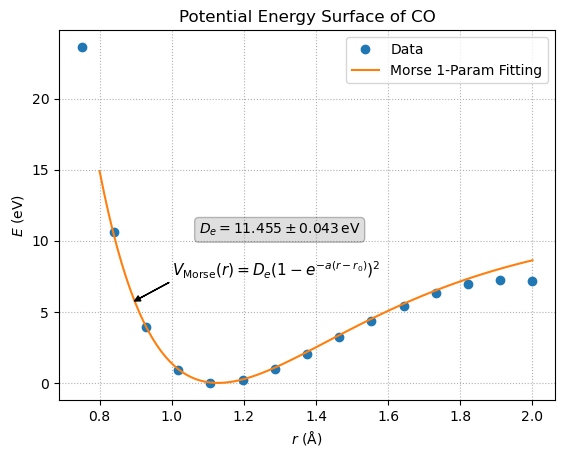

In [52]:
morse_fitted_1param = morse_1param_CO(r_fitted, *morse_1param_CO_fit[0])

plt.plot(r, E_eV, marker='o', linestyle='', label='Data')
plt.plot(r_fitted, morse_fitted_1param, linestyle='-', label='Morse 1-Param Fitting')

plt.xlabel('$r\ (\mathrm{\AA})$')
plt.ylabel('$E\ (\mathrm{eV})$')
plt.title('Potential Energy Surface of CO')

params_text_1param = rf'$D_e = {morse_1param_CO_fit[0][0]:.3f} \pm {morse_1param_CO_fit[1][0][0]:.3f}\, \mathrm{{eV}}$'

plt.text(1.075, 10.5, params_text_1param, bbox=dict(boxstyle="round", ec='black', fc='grey', alpha=0.25))

annotate_coords_1param = (r_fitted[8], morse_fitted_1param[8])
plt.annotate(morse_text, annotate_coords_1param, (1.0, 7.5), fontsize=11, fontweight='bold', arrowprops=arrowset2)

plt.grid(linestyle=':')

plt.legend()
plt.show()

<span style="color:green">**Exercise**:</span> Try again for a two-parameter Morse potential, fitting $D_e$ and $a$. Make a plot like the one above. _You don't need to put all code in a single cell—create as many cells as you need!_

Determine which one (1-parameter, 2-parameter, or 3-parameter) is better for fitting the Morse potential.

## End-of-Lesson Problems

### Problem 1: Michaelis–Menten Kinetics

The [Michaelis–Menten kinetics](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) model is a commonly used model to describe the kinetics of enzyme catalysis. For an enzymatic reaction
$$ \ce{E + S <=>[$k_1$][$k_{-1}$] ES ->[$k_2$] E + P} $$
the Michaelis–Menten equation is:
$$ v = \frac{V_\text{max} \ce{[S]}}{K_\text{M} + \ce{[S]} } $$
where $v$ is the rate of reaction, $V_\text{max}$ is limiting rate approached by the system at saturating substrate concentration for a given enzyme concentration, $K_\text{M}$ is the Michaelis constant, defined as
$$ K_\text{M} = \frac{k_{-1} + k_2}{k_1} $$
and $\ce{[S]}$ is the substrate concentration.

Use `curve_fit` to find $V_\text{max}$ and $K_\text{M}$, and report their associated standard deviation.

### Problem 2: Weighted Curve Fitting

## Acknowledgement

This lesson draws on ideas from the following sources:

- [Matplotlib Official Website](https://matplotlib.org)
- [NumPy Official Website](https://numpy.org)
- [Scipy Official Website](https://scipy.org)
- [Scipy Lecture Notes](https://scipy-lectures.org)
- Charles J. Weiss's [Scientific Computing for Chemists with Python](https://weisscharlesj.github.io/SciCompforChemists/notebooks/introduction/intro.html)
- [An Introduction to Python for Chemistry](https://pythoninchemistry.org/intro_python_chemists/intro.html)
- GenAI for making paragraphs and codes(・ω< )★
- And so many resources on Reddit, StackExchange, etc.!